In [53]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [32]:
iris = load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

In [39]:
dt = DecisionTreeClassifier(max_depth=1)
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=1),n_estimators=100)

dt.fit(X,y)
bagging.fit(X,y)

y_hat_dt = dt.predict(X)
y_hat_bag = bagging.predict(X)

print(f"DT Accuracy = {accuracy_score(y,y_hat_dt)}")
print(f"Bagging Accuracy = {accuracy_score(y,y_hat_bag)}")

DT Accuracy = 0.6666666666666666
Bagging Accuracy = 0.96


In [34]:
dt = DecisionTreeClassifier(min_samples_leaf=1)
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(min_samples_leaf=1),n_estimators=100)

dt.fit(X,y)
bagging.fit(X,y)

y_hat_dt = dt.predict(X)
y_hat_bag = bagging.predict(X)

print(f"DT Accuracy = {accuracy_score(y,y_hat_dt)}")
print(f"Bagging Accuracy = {accuracy_score(y,y_hat_bag)}")

DT Accuracy = 0.9933333333333333
Bagging Accuracy = 0.9933333333333333


In [35]:
param = {'ccp_alpha' : [0.01,0.1,1,10]}
grid_search = GridSearchCV(DecisionTreeClassifier(),param)
grid_search.fit(X,y)
print(grid_search.best_params_)

{'ccp_alpha': 0.1}


In [36]:
dt = DecisionTreeClassifier(ccp_alpha=0.1)
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.1),n_estimators=100)

dt.fit(X,y)
bagging.fit(X,y)

y_hat_dt = dt.predict(X)
y_hat_bag = bagging.predict(X)

print(f"DT Accuracy = {accuracy_score(y,y_hat_dt)}")
print(f"Bagging Accuracy = {accuracy_score(y,y_hat_bag)}")

DT Accuracy = 0.9533333333333334
Bagging Accuracy = 0.9533333333333334


# 2

In [40]:
X = iris.data[:]
y = iris.target

In [44]:
lr = LinearRegression()
bag = BaggingClassifier(estimator=LinearRegression(),n_estimators=100)

lr.fit(X,y)
bag.fit(X,y)

y_hat_lr = lr.predict(X)
y_hat_bag = bag.predict(X)

print(f"LR Accuracy = {accuracy_score(y,y_hat_lr)}")
print(f"Bagging Accuracy = {accuracy_score(y,y_hat_bag)}")

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [45]:
nn = KNeighborsClassifier(n_neighbors=1)
bag = BaggingClassifier(KNeighborsClassifier(n_neighbors=1),n_estimators=100)

nn.fit(X,y)
bag.fit(X,y)

y_hat_nn = nn.predict(X)
y_hat_bag = bag.predict(X)

print(f"LR Accuracy = {accuracy_score(y,y_hat_nn)}")
print(f"Bagging Accuracy = {accuracy_score(y,y_hat_bag)}")

LR Accuracy = 1.0
Bagging Accuracy = 1.0


In [46]:
nn = KNeighborsClassifier(n_neighbors=30)
bag = BaggingClassifier(KNeighborsClassifier(n_neighbors=30),n_estimators=100)

nn.fit(X,y)
bag.fit(X,y)

y_hat_nn = nn.predict(X)
y_hat_bag = bag.predict(X)

print(f"LR Accuracy = {accuracy_score(y,y_hat_nn)}")
print(f"Bagging Accuracy = {accuracy_score(y,y_hat_bag)}")

LR Accuracy = 0.9533333333333334
Bagging Accuracy = 0.9666666666666667


In [50]:
def compare_knn_bag(k):
    nn = KNeighborsClassifier(n_neighbors=k)
    bag = BaggingClassifier(KNeighborsClassifier(n_neighbors=k),n_estimators=100)

    nn.fit(X,y)
    bag.fit(X,y)

    y_hat_nn = nn.predict(X)
    y_hat_bag = bag.predict(X)
    return accuracy_score(y,y_hat_nn), accuracy_score(y,y_hat_bag)

In [51]:
k = []
acc_nn = []
acc_bag = []
for i in range(1,100):
    k.append(i)
    nn, bag = compare_knn_bag(i)
    acc_nn.append(nn)
    acc_bag.append(bag)

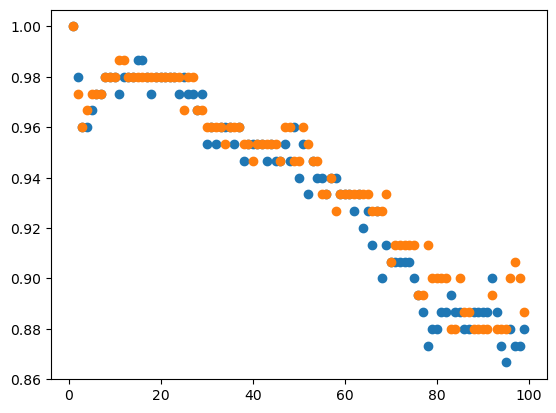

In [54]:
plt.scatter(k,acc_nn)
plt.scatter(k,acc_bag)
plt.
plt.show()